<a href="https://colab.research.google.com/github/yellayujin/mulcamp34/blob/main/240112_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀분석

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.formula.api as smf


statsmodels.__version__

'0.14.0'

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
model = smf.ols(formula = 'sepal_length ~ sepal_width', data = iris).fit()  # formula='y ~ X'
model.summary()  # print()안에 넣으면 더 익숙한 형태임

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.074
Date:                Fri, 12 Jan 2024   Prob (F-statistic):              0.152
Time:                        15:10:09   Log-Likelihood:                -183.00
No. Observations:                 150   AIC:                             370.0
Df Residuals:                     148   BIC:                             376.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5262      0.479     13.628      0.000       5.580       7.473
sepal_width    -0.2234      0.155     -1.440      0.152      -0.530       0.083
==============================================================================
Omnibus:                        4.389   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                4.237
Skew:                           0.360   Prob(JB):                        0.120
Kurtosis:                       2.600   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 결정계수 매우 낮아 안좋은 모델->시각화해보면 암
- Intercept(절편, 상수항)
- coef(결정계수)
- sepal_width의 coef: sepal_width의 기울기(음수임)
    y = -0.2234x + 6.5262    
    + 기울기가 완만하다 = 멀리 떨어진 데이터와 회귀선 사이의 간격이 큼
    + 변수로 쓸 수가 없으므로(기울기가 0에 가까워 y에 주는 영향 극히 적음) 영향 여부도 자연히 따질 수 없음
- sepal_width의 p-value = 0.152 > 0.05이므로 귀무가설 채택(기울기가 0이다)   + 회귀에서의 H0과 H1은 기울기가지고 얘기함

In [ ]:
model = smf.ols(formula = 'sepal_length ~ petal_length + sepal_width', data = iris).fit()
print(model.summary() )

# p-value 보면 두 변수 모두 유의함->그럼 기울기가 아닌 상관계수로 구함

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     386.4
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           2.93e-59
Time:                        16:08:20   Log-Likelihood:                -46.513
No. Observations:                 150   AIC:                             99.03
Df Residuals:                     147   BIC:                             108.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.2491      0.248      9.070   

### statsmodels에서의 범주형 변수 더미변수화
- 자동으로 해줌
- Thus smf.ols('y ~ X(문자) + X(숫자)', data).fit()으로 바로 해도 됨

In [ ]:
# 상관계수 구하고 비교하기
iris.loc[:, ['sepal_length', 'sepal_width', 'petal_length']].rcorr()
# petal_length가 더 높음

,sepal_length,sepal_width,petal_length
sepal_length,-,,***
sepal_width,-0.118,-,***
petal_length,0.872,-0.428,-


In [ ]:
mod3 = pg.linear_regression(iris['petal_length'], iris['sepal_length'])
mod3.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,4.31,0.08,54.94,0.0,0.76,0.76,4.15,4.46
1,petal_length,0.41,0.02,21.65,0.0,0.76,0.76,0.37,0.45


In [ ]:
mod3 = pg.linear_regression(iris['sepal_width'], iris['sepal_length'])
mod3.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,6.53,0.48,13.63,0.00,0.01,0.01,5.58,7.47
1,sepal_width,-0.22,0.16,-1.44,0.15,0.01,0.01,-0.53,0.08


In [ ]:
# 실제로 위 두 변수에 대한 r2(결정계수)를 비교했을 때, petal_length의 결정계수가 더 높음

## 회귀분석에서의 검토사항
- 회귀계수들이 유의미한가?
    - 해당 계수의 t통계량의 p-value가 0.05보다 작으면 해당 회귀계수가 통계적으로 유의하다고 볼 수 있다.
    - p-value >= 0.05 = 회귀계수가 유의하지 않다 = 기울기가 0이다 = x가 변화해도 y가 거의 변화되지 않는다.(=영향을 거의 미치지 않는다)
- 모형이 얼마나 설명력을 갖는가?
    - 결정계수(R^2)를 확인한다. 결정계수는 0과 1 사이의 값을 가지며, 높은 수치를 가질수록 회귀식의 설명력이 높다.
- 모형이 데이터를 잘 적합하고 있는가?
    - 잔차를 그래프로 그리고 회귀진단을 한다.
    - 모형의 잔차가 특정 패턴을 이루고 있지 않아야한다.(등분산성 만족)
- 회귀모형이 통계적으로 유의한가?
    - 선형회귀모형의 통계량은 F통계량을 사용한다. F-통계량의 p-value가 유의수준(알파)보다 작으면 (귀무가설 기각)회귀식이 통계적으로 유의하다고 볼 수 있다.
        - 귀무가설: 통계가설은 유의하지 않다.
        - 대립가설: 통계가설은 유의하다.
    

In [ ]:
intercept = model.params.Intercept   # 절편(상수항)
slope = model.params.sepal_width     # 기울기
slope

-0.2233610611298997

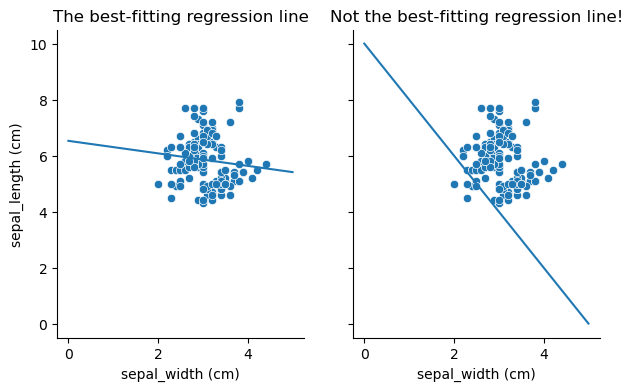

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 4), sharey=True)
x = np.linspace(0,5)

sns.scatterplot(data = iris, x = 'sepal_width', y = 'sepal_length', ax = ax[0])
fig.axes[0].set_title("The best-fitting regression line")
fig.axes[0].set_xlabel("sepal_width (cm)")
fig.axes[0].set_ylabel("sepal_length (cm)")
fig.axes[0].plot(x,slope*x+intercept)

sns.scatterplot(data = iris, x = 'sepal_width', y = 'sepal_length', ax = ax[1])
fig.axes[1].set_title("Not the best-fitting regression line!")
fig.axes[1].set_xlabel("sepal_width (cm)")
fig.axes[1].set_ylabel("sepal_length (cm)")
fig.axes[1].plot(x,-2*x+10)

sns.despine()
plt.show()

In [ ]:
import pingouin as pg

mod1 = pg.linear_regression(iris['sepal_width'], iris['sepal_length'])    # x, y순서
mod1.round(2)

# but 이 방법은 빅분기 실기에서는 못 씀

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,6.53,0.48,13.63,0.00,0.01,0.01,5.58,7.47
1,sepal_width,-0.22,0.16,-1.44,0.15,0.01,0.01,-0.53,0.08


In [ ]:
predictors = ['sepal_width', 'petal_length']
outcome = 'sepal_length'

mod2 = pg.linear_regression(iris[predictors], iris[outcome])
mod2.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.25,0.25,9.07,0.0,0.84,0.84,1.76,2.74
1,sepal_width,0.60,0.07,8.59,0.0,0.84,0.84,0.46,0.73
2,petal_length,0.47,0.02,27.57,0.0,0.84,0.84,0.44,0.51
